# Case Study on Probability for Data Science



To make a suitable machine learning algorithm to predict if the mushroom is edible or poisonous (e or p) using the given dataset.

(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)

Also, if some data pre-processing is necessary do that as well.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
rd=pd.read_csv(r"C:\Users\USER\Downloads\mushrooms.csv")
rd

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
rd.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [4]:
rd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
rd.shape

(8124, 23)

In [6]:
rd.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
la=LabelEncoder()
for column in rd.columns:
    rd[column]=la.fit_transform(rd[column])
rd

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


C:\Users\USER\anaconda31\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


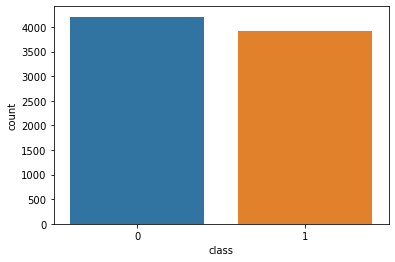

In [8]:
sns.countplot(rd['class'])
plt.show()

In [21]:
rd['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

59.79% of mushrooms belongs to poisonous class while 48.2% belongs to edible class.

In [9]:
rd.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
y=rd['class']
x=rd.drop('class',axis=1)


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.25)
x_train.shape

(6093, 22)

# Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
Lr=LogisticRegression(max_iter=500)
model=Lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1038
           1       0.95      0.95      0.95       993

    accuracy                           0.95      2031
   macro avg       0.95      0.95      0.95      2031
weighted avg       0.95      0.95      0.95      2031



***Logistic regression model gives the accuracy score of 0.95***

In [30]:
print(confusion_matrix(y_pred,y_test))

[[989  49]
 [ 51 942]]


# SVM

In [13]:
from sklearn import svm
sv=svm.SVC()
model=sv.fit(x_train,y_train)
pred_y=model.predict(x_test)
print(classification_report(pred_y,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1053
           1       0.98      1.00      0.99       978

    accuracy                           0.99      2031
   macro avg       0.99      0.99      0.99      2031
weighted avg       0.99      0.99      0.99      2031



***SVM gives the accuracy of 0.99***

In [28]:
print(confusion_matrix(pred_y,y_test))

[[1040    0]
 [   0  991]]


# KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

value=[]
nbs=np.arange(3,15)
for k in nbs:
    knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model=knn.fit(x_train,y_train)
    pred=model.predict(x_test)
    acc=accuracy_score(pred,y_test)
    value.append(acc)
value
    
    

[0.9980305268340719,
 0.9970457902511078,
 0.9960610536681438,
 0.9965534219596258,
 0.9955686853766618,
 0.9950763170851797,
 0.9960610536681438,
 0.9945839487936977,
 0.9935992122107337,
 0.9931068439192516,
 0.9926144756277696,
 0.9940915805022157]

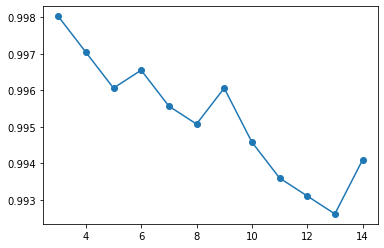

In [15]:
plt.plot(nbs,value,'o-')

In [31]:
knn=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
model=knn.fit(x_train,y_train)
predi=model.predict(x_test)
print(classification_report(predi,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1038
           1       1.00      1.00      1.00       993

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



***KNN gives the accuracy score of 1***

In [32]:
print(confusion_matrix(predi,y_test))

[[1037    1]
 [   3  990]]


# Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
pred_y=rf.predict(x_test)
print(classification_report(y_test,pred_y))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



***Random Forest model gives the accuracy score of 1***

In [33]:
print(confusion_matrix(pred_y,y_test))

[[1040    0]
 [   0  991]]


# Decision Tree

In [18]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(x_train,y_train)
ypred=model.predict(x_test)
print(classification_report(ypred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1040
           1       1.00      1.00      1.00       991

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



***Decision Tree model gives the accuracy score of 1***

In [34]:
print(confusion_matrix(ypred,y_test))

[[1040    0]
 [   0  991]]


# Naive Bayes

In [35]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
model=nb.fit(x_train, y_train)
predn=model.predict(x_test)
print(classification_report(predn, y_test))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1025
           1       0.93      0.92      0.93      1006

    accuracy                           0.93      2031
   macro avg       0.93      0.93      0.93      2031
weighted avg       0.93      0.93      0.93      2031



***Gaussian Naive Bayes classifier model gives the accuracy score of 0.93***

In [36]:
print(confusion_matrix(predn,y_test))

[[958  67]
 [ 82 924]]


In [37]:
from sklearn.naive_bayes import BernoulliNB
nb = BernoulliNB()
model=nb.fit(x_train, y_train)
predt=model.predict(x_test)
print(classification_report(predt, y_test))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      1244
           1       0.74      0.93      0.82       787

    accuracy                           0.84      2031
   macro avg       0.84      0.86      0.84      2031
weighted avg       0.87      0.84      0.85      2031



***Bernoulli Naive Bayes classifier model gives the accuracy score of 0.84***

In [38]:
print(confusion_matrix(predt,y_test))

[[984 260]
 [ 56 731]]


***KNN,Decision Tree,Random Forest are the best models to predict if the mushroom is poisonous or edible since they give the accuracy score of 1***